In [1]:
### Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
### Import Dataset

In [8]:
quant_dataset=pd.read_csv('nifty_vs_quant_nav.csv')
quant_dataset

,Nifty 50 Change,NAV Changes in ₹
0,0.00,0.00
1,0.00,0.00
2,271.65,3.44
3,179.55,0.21
4,120.60,2.08
...,...,...
312,-45.80,1.02
313,-128.80,-3.24
314,321.50,0.54
315,0.00,0.00


In [9]:
#### How big is the dataset? (Rows and columns)

In [10]:
quant_dataset.shape

(317, 2)

In [11]:
quant_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nifty 50 Change   317 non-null    float64
 1   NAV Changes in ₹  317 non-null    float64
dtypes: float64(2)
memory usage: 5.1 KB


In [12]:
#### Data Pre-processing: Finding out NaN values

In [13]:
quant_dataset.isna().any()

Nifty 50 Change     False
NAV Changes in ₹    False
dtype: bool

In [14]:
#### Rename specific columns

In [15]:
quant_dataset.rename(columns = {'Nifty 50 Change':'nifty_50_change','Net Asset Value Change in ₹':'axis_nav_changes'},inplace = True)

In [16]:
quant_dataset

,nifty_50_change,NAV Changes in ₹
0,0.00,0.00
1,0.00,0.00
2,271.65,3.44
3,179.55,0.21
4,120.60,2.08
...,...,...
312,-45.80,1.02
313,-128.80,-3.24
314,321.50,0.54
315,0.00,0.00


In [17]:
#having a glance at the first five records of the dataset
quant_dataset.head()

,nifty_50_change,NAV Changes in ₹
0,0.00,0.00
1,0.00,0.00
2,271.65,3.44
3,179.55,0.21
4,120.60,2.08


### Importing the ML Libraries

In [20]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [22]:
quant_dataset

,nifty_50_change,NAV Changes in ₹
0,0.00,0.00
1,0.00,0.00
2,271.65,3.44
3,179.55,0.21
4,120.60,2.08
...,...,...
312,-45.80,1.02
313,-128.80,-3.24
314,321.50,0.54
315,0.00,0.00


In [23]:
quant_dataset.shape

(317, 2)

In [24]:
#Independent Variable
X=quant_dataset.iloc[:,:-1].values

#Dependent Variable
y=quant_dataset.iloc[:,-1].values

In [25]:
X

array([[   0.  ],
       [   0.  ],
       [ 271.65],
       [ 179.55],
       [ 120.6 ],
       [-179.38],
       [  66.8 ],
       [   0.  ],
       [   0.  ],
       [ 190.6 ],
       [  52.45],
       [ 156.6 ],
       [  45.45],
       [  -2.05],
       [   0.  ],
       [   0.  ],
       [  52.35],
       [-195.05],
       [-174.65],
       [-181.4 ],
       [-139.85],
       [   0.  ],
       [   0.  ],
       [-468.05],
       [ 128.85],
       [   0.  ],
       [-167.8 ],
       [  -8.2 ],
       [   0.  ],
       [   0.  ],
       [ 237.9 ],
       [ 237.  ],
       [ 203.15],
       [-219.8 ],
       [ -43.9 ],
       [   0.  ],
       [   0.  ],
       [-302.7 ],
       [  53.15],
       [ 197.05],
       [ 142.05],
       [-231.1 ],
       [   0.  ],
       [   0.  ],
       [-531.95],
       [ 509.95],
       [ -30.25],
       [ -17.6 ],
       [ -28.3 ],
       [   0.  ],
       [   0.  ],
       [ -69.65],
       [-114.45],
       [ -28.95],
       [-815.3 ],
       [ 4

In [26]:
y

array([  0.    ,   0.    ,   3.44  ,   0.21  ,   2.08  ,  -0.73  ,
         0.99  ,   0.    ,   0.    ,   3.38  ,   0.45  ,   1.55  ,
         1.9   ,   2.15  ,   0.    ,   0.    ,   0.56  ,  -4.94  ,
        -0.95  ,  -0.54  ,  -3.61  ,   0.    ,   0.    , -10.07  ,
         4.53  ,   0.    ,  -1.22  ,   0.91  ,   0.    ,   0.    ,
         2.49  ,   4.44  ,   3.34  ,  -0.58  ,   0.03  ,   0.    ,
         0.    ,  -2.19  ,  -1.95  ,   3.06  ,   1.11  ,  -3.5   ,
         0.    ,   0.    , -11.301 ,   6.72  ,  -0.37  ,  -1.65  ,
        -1.62  ,   0.    ,   0.    ,  -4.89  ,  -3.34  ,   1.07  ,
       -13.71  ,   8.32  ,   0.    ,   0.    ,   3.04  ,   0.    ,
        -0.76  ,   0.32  ,  -4.57  ,   0.    ,   0.    ,  -4.89  ,
         2.77  ,   5.26  ,   2.56  ,   0.69  ,   0.    ,   0.    ,
         1.17  ,  -2.31  ,   4.32  ,   3.68  ,   0.    ,   0.    ,
         0.    ,  -0.25  ,   1.67  ,  -0.32  ,   4.34  ,   0.38  ,
         0.    ,   0.    ,   1.01  ,   3.25  ,   1.74  ,   0.8

In [27]:
### Splitting the dataset (Training and Testing)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test =train_test_split(X,y,test_size=1/3, random_state=0)

In [29]:
X_train

array([[  49.85],
       [   0.  ],
       [ -14.75],
       [   5.4 ],
       [   0.  ],
       [ -54.65],
       [   0.  ],
       [   0.  ],
       [-331.55],
       [   0.  ],
       [   0.  ],
       [  -4.6 ],
       [   0.  ],
       [   0.  ],
       [-531.95],
       [  36.45],
       [ -60.1 ],
       [   0.  ],
       [ -19.  ],
       [ 127.6 ],
       [-220.65],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [-174.65],
       [   0.  ],
       [-169.45],
       [   0.  ],
       [ 229.3 ],
       [   0.  ],
       [ 133.2 ],
       [ -51.45],
       [-207.  ],
       [ -69.75],
       [ -82.5 ],
       [-142.5 ],
       [   0.  ],
       [ 154.45],
       [ 258.55],
       [  52.35],
       [ 311.7 ],
       [ 177.9 ],
       [ 181.8 ],
       [-226.5 ],
       [ 456.75],
       [ 120.6 ],
       [-168.1 ],
       [   0.  ],
       [-107.9 ],
       [ 331.9 ],
       [   0.  ],
       [-276.3 ],
       [ 119.  ],
       [   0.  ],
       [   0.  ],
       [ 1

In [30]:
### Training the Simple Regression Model

In [31]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [32]:
### Prediction of Testing dataset

In [33]:
y_pred=reg.predict(X_test)

In [34]:
y_pred

array([  0.04985131,   2.55843308,   5.95548589,   1.97355296,
         0.04985131,  -0.95516411,  -2.28679154,   0.12251169,
         0.04985131,   0.04985131,  -0.68538545,   1.86779973,
         0.04985131,   0.04985131,   0.04985131,   3.33971206,
        -0.55876934,   2.67281923,  -0.57891281,   4.54400397,
        -2.36448779,   1.86276386,   2.64404284,  -3.80258787,
        -0.03863609,   1.53183538,   0.04985131,   0.04985131,
        -2.65440992,  -4.42559671,   0.04985131,   0.04985131,
         4.20300376,  -1.5968776 ,   0.70379476,   1.311696  ,
         2.13326192,  -1.02063039,   2.11239904,  -1.22422335,
        -0.19690624,  -5.44931677,   0.04985131,   0.86494255,
         1.36493232,   6.04972857,   0.18869739,   0.04985131,
         0.9426388 ,   0.04985131,  -2.15442015,   0.44480726,
         0.04985131,  -2.7565661 ,   4.97349159,   0.04985131,
         2.12678724,  -1.35875297,   0.04985131,   2.212397  ,
         0.04985131,   0.04985131,  -0.90408601,  -0.83

In [35]:
### Visualising the results

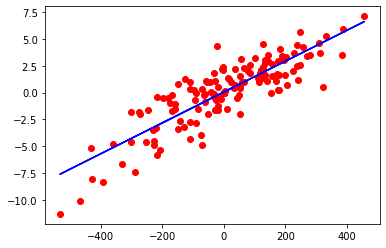

In [36]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train, reg.predict(X_train), color='blue')

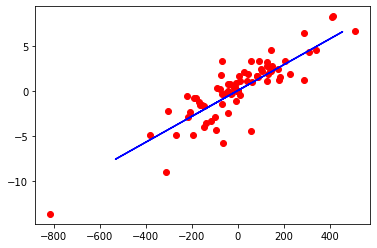

In [37]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train, reg.predict(X_train), color='blue')

In [38]:
#Coefficient
b=reg.coef_

In [39]:
b

array([0.01438819])

In [40]:
#Intercept
a=reg.intercept_

In [41]:
a

0.04985130630414613

In [46]:
reg.predict([[100]])

array([1.48867079])

In [47]:
reg.predict([[-100]])

array([-1.38896818])